## Step 1: MTI Dataset

The very first step is started by reading the data from as CSV file using Pandas library. Then a primary data exploration step is being done to find out any missing categories and the distribution for each type of indicator (I/E, N/S, T/F, J/P).

In [1]:
import pandas as pd


datastore_Path = "C:/Users/Shaya/Desktop/Ryerson/Sync/CIND820/Dataset/(MBTI) Myers-Briggs Personality Type Dataset/mbti_1.csv"

pd.set_option('display.max_colwidth', 500)
mbti_Dataset = pd.read_csv(datastore_Path,  sep=",", header = 0, encoding = 'unicode_escape')
mbti_Dataset.columns = ['Type','Posts']
mbti_Dataset.head()

Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...  
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...  
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...  
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...

### 1-1 : High level data exploration

In [2]:
#What is the shaper of our dataset:
print("Dataset has {} rows and {} columns".format(len(mbti_Dataset), len(mbti_Dataset.columns)),'\n')

#Personality Type variation on the Dataset
print('Number of each personality type:', dict(mbti_Dataset.value_counts(subset='Type')),'\n')

#How many missing data are in the Dataset:
print('Number of missing values in personality Type: {}'.format(mbti_Dataset['Type'].isnull().sum()))
print('Number of missing values in Posts: {}'.format(mbti_Dataset['Posts'].isnull().sum()))

Dataset has 8675 rows and 2 columns 

Number of each personality type: {'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39} 

Number of missing values in personality Type: 0
Number of missing values in Posts: 0


<AxesSubplot:ylabel='Type'>

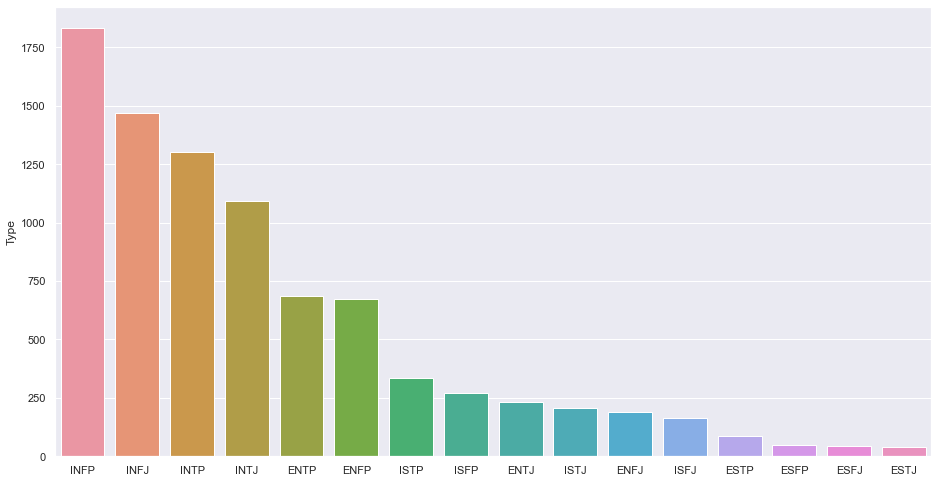

In [3]:
import seaborn as sns

graph = mbti_Dataset.value_counts(subset='Type')
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=mbti_Dataset.Type.value_counts().index, y=mbti_Dataset.Type.value_counts())


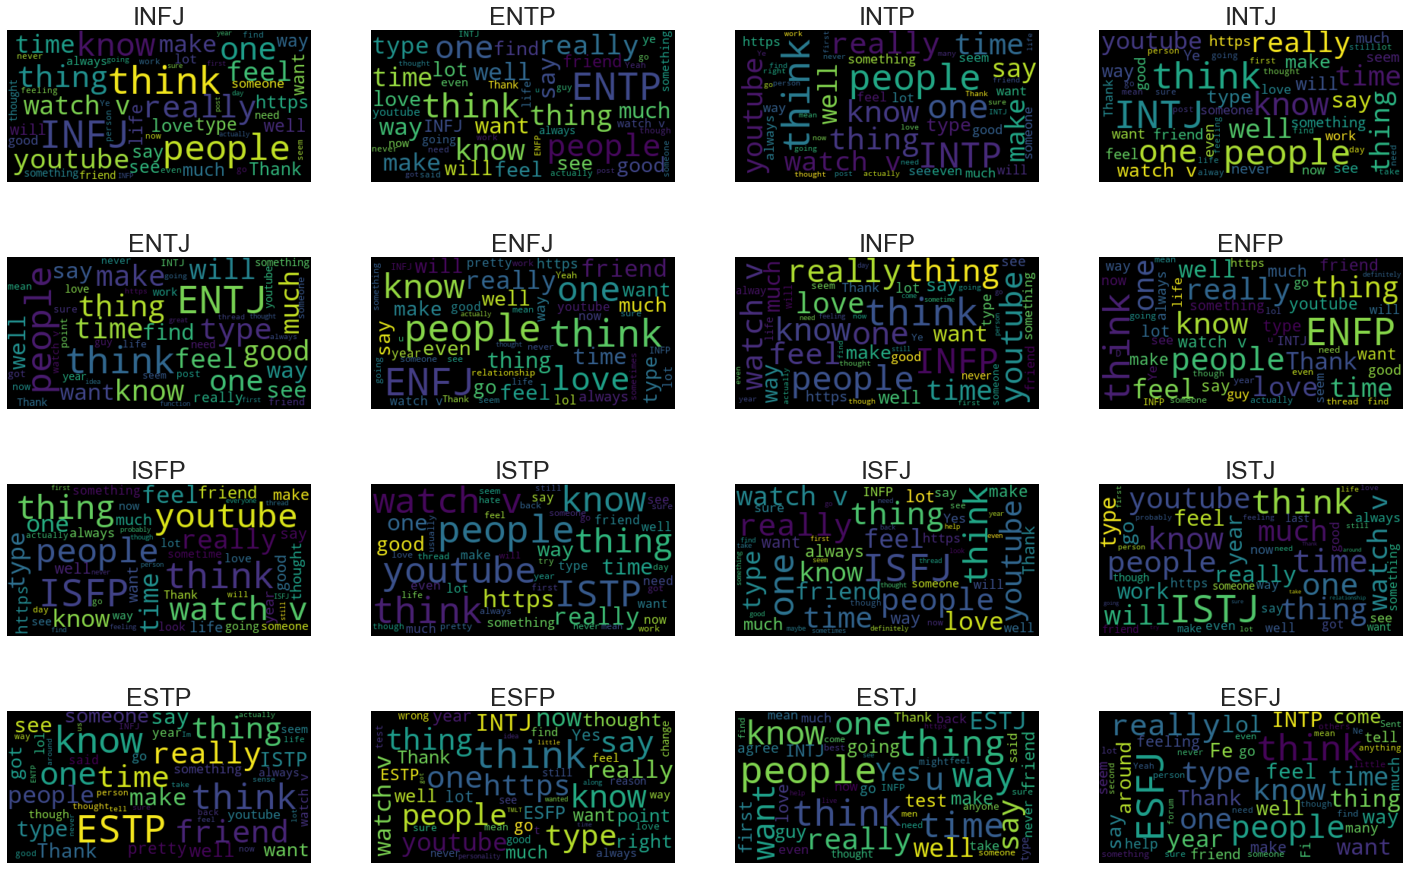

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

type_Number = len(mbti_Dataset['Type'].unique())
fig, ax = plt.subplots(type_Number, figsize=(25,type_Number))
i = 0
for t in mbti_Dataset['Type'].unique():
    temp_Df = mbti_Dataset[mbti_Dataset['Type'] == t]
    WC = WordCloud(background_color="black", max_words=50, max_font_size=50).generate(temp_Df['Posts'].to_string())
    plt.subplot(4,4,i+1)
    plt.title(label = t, fontsize=25)
    plt.axis("off")
    plt.imshow(WC, interpolation='bilinear')
    i+=1

### 1-2: Split each Type into it's categories.

In [5]:
mbti_Dataset['IE'] = None
mbti_Dataset['NS'] = None
mbti_Dataset['FT'] = None
mbti_Dataset['PJ'] = None

for i, t in enumerate(mbti_Dataset.Type):
    if 'I' in t:
        mbti_Dataset['IE'][i] = 'I'
    elif 'E' in t:
        mbti_Dataset['IE'][i] = 'E'

    if 'N' in t:
        mbti_Dataset['NS'][i] = 'N'
    elif 'S' in t:
        mbti_Dataset['NS'][i] = 'S'

    if 'F' in t:
        mbti_Dataset['FT'][i] = 'F'
    elif 'T' in t:
        mbti_Dataset['FT'][i] = 'T'

    if 'P' in t:
        mbti_Dataset['PJ'][i] = 'P'
    elif 'J' in t:
        mbti_Dataset['PJ'][i] = 'J'

mbti_Dataset.head()

Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  
0  I  N  F  J  
1  E  N  T  P  
2  I  N  T  P  
3  I  N  T  J  
4  E  N  T  J

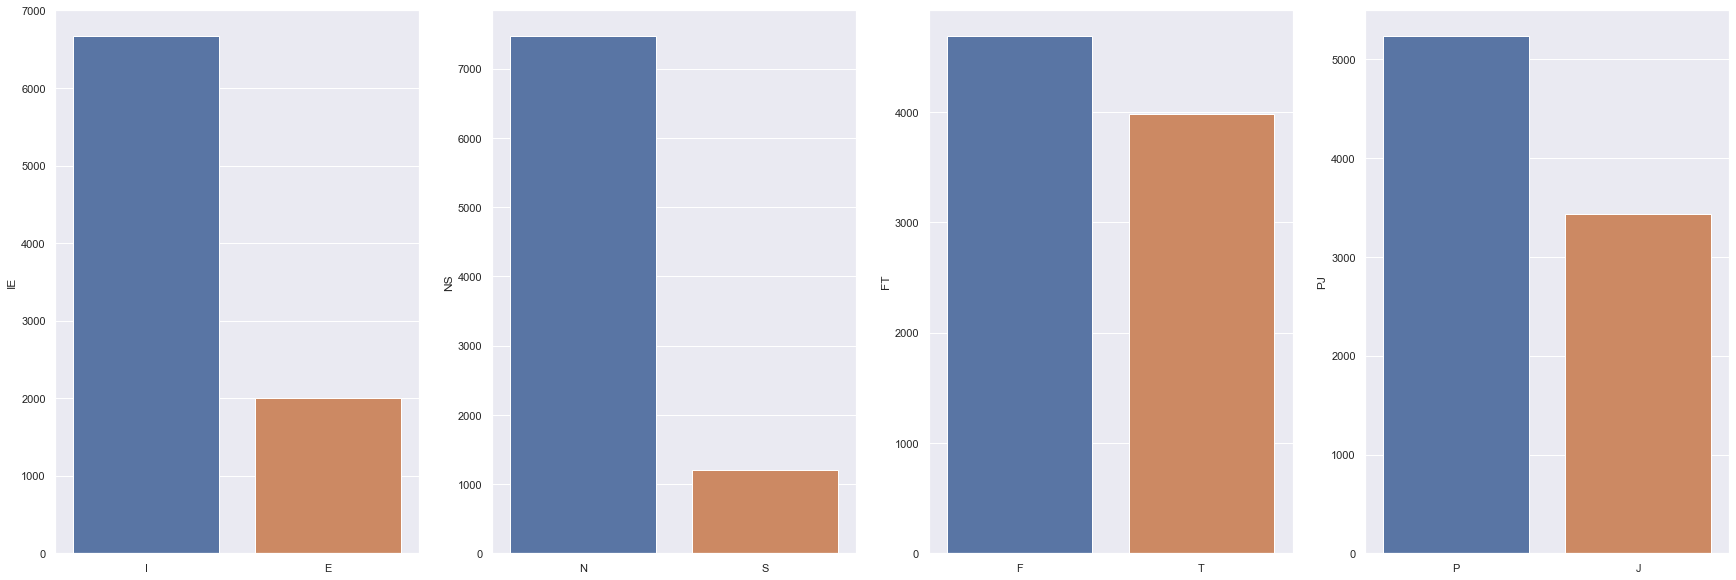

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

category_List = ['IE', 'NS', 'FT', 'PJ']

fig, axes = plt.subplots(1,4, figsize=(30,10))
sns.set_theme(style="whitegrid")
for i, category in enumerate(category_List):
    sns.barplot(ax=axes[i], x=mbti_Dataset[category].value_counts().index, y=mbti_Dataset[category].value_counts())

## Step 2: Clean Text/Descriptive
Tokenization means that we are splitting our text into smaller pieces, in our case words. Each of these smaller pieces are called tokens.


### 2-1: Removeing punctuation/URLs/Contraction and checking for emoji

In [7]:
import string
import re
import contractions
from emoji import UNICODE_EMOJI
string.punctuation

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def remove_Contraction(text):
    """Remove Contraction from the input Text"""
    return contractions.fix(text)

def check_Emoji(text):
    """Check if text has Emoji"""
    return text in UNICODE_EMOJI['en']


def remove_punctuation(text):
    """Remove Punctuation from the input Text"""
    """!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"""
    text_punctuated = "".join([char for char in text if char not in string.punctuation])
    return text_punctuated

mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts'].str.replace('|||', ' ', regex = False)
mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_URL(x))
mbti_Dataset['Posts_Clean'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_Contraction(x))

emoji_Result = mbti_Dataset['Posts_Clean'].apply(lambda x: check_Emoji(x))
if emoji_Result.any():
    print("We have emoji on the Dataset")
else:
    print('No emoji on Dataset')

mbti_Dataset['Posts_Punctuated'] = mbti_Dataset['Posts_Clean'].apply(lambda x: remove_punctuation(x))
mbti_Dataset.head()

No emoji on Dataset


Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  \
0  I  N  F  J   
1  E  N  T  P   
2  I  N  T  P   
3  I  N  T  J   
4  E  N  T  J   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Posts_Clean  \
0  '  enfp and intj moments    sportscenter not top ten plays    pranks What has been the most life-changing experience in your life?      On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the ne

### 2-2: Tokenization

In [8]:
def tokenize_data(text):
    """Tokenizing input text"""
    tokens = re.split('\W+', text.lower())
    return tokens

mbti_Dataset['Posts_Tokenized'] = mbti_Dataset['Posts_Punctuated'].apply(lambda x: tokenize_data(x))
mbti_Dataset.head()

Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  \
0  I  N  F  J   
1  E  N  T  P   
2  I  N  T  P   
3  I  N  T  J   
4  E  N  T  J   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Posts_Clean  \
0  '  enfp and intj moments    sportscenter not top ten plays    pranks What has been the most life-changing experience in your life?      On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the ne

### 2-3: Remove Stopwords

In [9]:
import nltk

def remove_Stopwords(text):
    """Removing Stops words"""
    stopwords = nltk.corpus.stopwords.words('english')
    addition_StopWords = ['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp', 'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']
    stopwords.extend(addition_StopWords)
    text_stopwords = [word for word in text if word not in stopwords]
    return(text_stopwords)

mbti_Dataset['Posts_Stopwords'] = mbti_Dataset['Posts_Tokenized'].apply(lambda x: remove_Stopwords(x))

mbti_Dataset.head()

Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  \
0  I  N  F  J   
1  E  N  T  P   
2  I  N  T  P   
3  I  N  T  J   
4  E  N  T  J   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Posts_Clean  \
0  '  enfp and intj moments    sportscenter not top ten plays    pranks What has been the most life-changing experience in your life?      On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the ne

In [10]:

def stemming(text):
    """Steming the input text using Porter Stemmer from NLTK package"""
    nltk_PS = nltk.PorterStemmer()
    text_Stem = [nltk_PS.stem(word) for word in text]
    return(text_Stem)

def lemmatizing(text):
    """Lemmatizing the input text using WordNet and NLTK package"""
    NLTK_WNL = nltk.WordNetLemmatizer()
    text_Lem = [NLTK_WNL.lemmatize(word) for word in text]
    return(text_Lem)

mbti_Dataset['Posts_Stemmed'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: stemming(x))
mbti_Dataset['Posts_Lemmatized'] = mbti_Dataset['Posts_Stopwords'].apply(lambda x: lemmatizing(x))

mbti_Dataset.head()

han we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  \
0  I  N  F  J   
1  E  N  T  P   
2  I  N  T  P   
3  I  N  T  J   
4  E  N  T  J   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Posts_Clean  \
0  '  enfp and intj moments    sportscenter not top ten plays    pranks What has been the most life-changing experience in your life?      On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~    Hello ENFJ7. Sorry to hear of your distress. it is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as time...   
1  'I am finding the lack of me in these posts very alarming. Sex can be boring if it is in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There is not enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin*  that is all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This + L...   
2  'Good one  _____    Of course, to which I say I know; that is my blessing and my curse. Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it is more I could be madly in love in case I reconciled my feelings (which at... No, I did not; thank you for a link! So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. it is like when you are stuck in your own thoughts, and your mind just wanders in cir...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created.

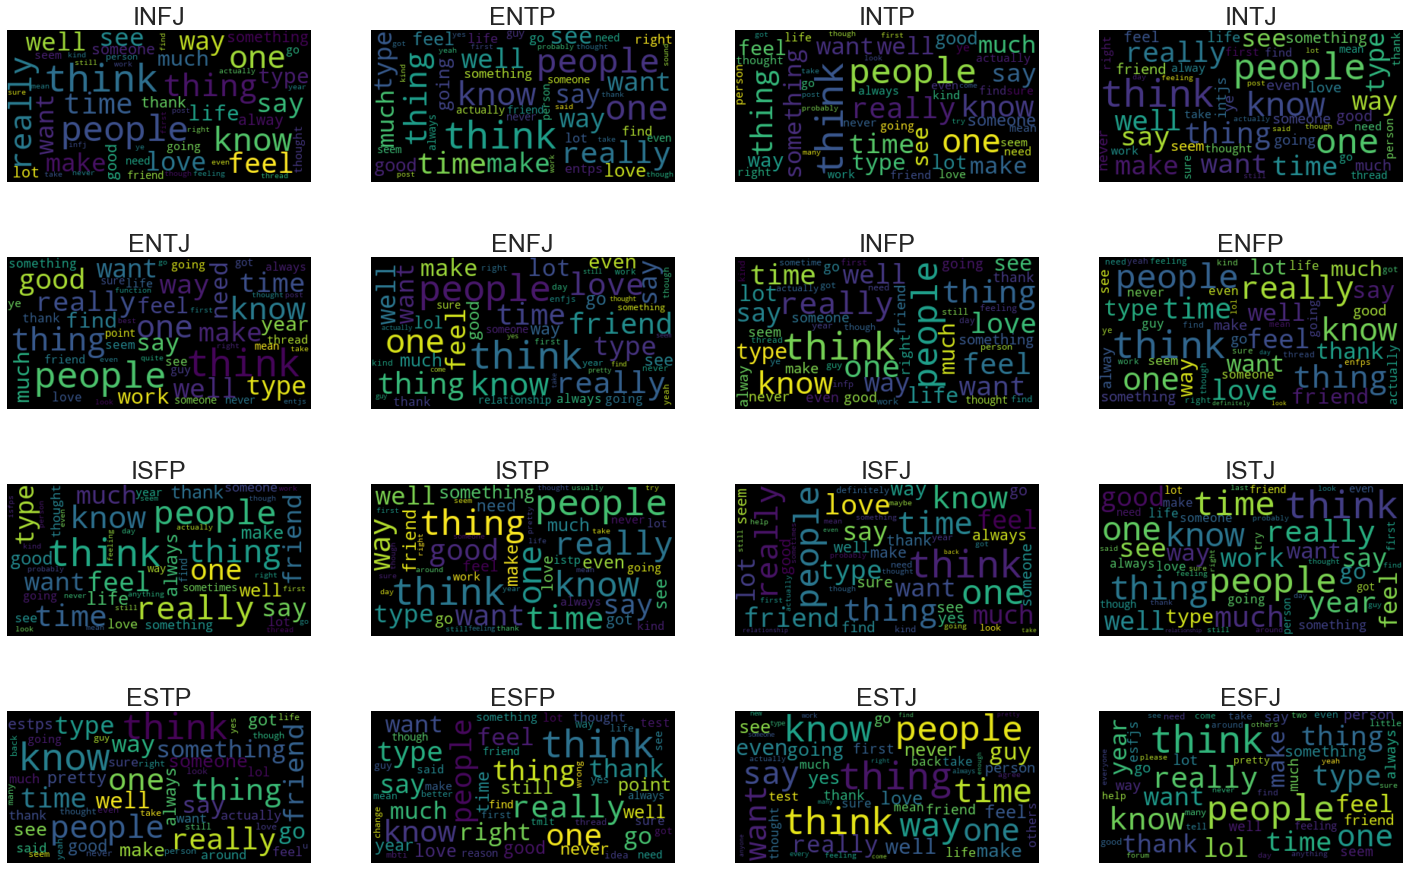

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

type_Number = len(mbti_Dataset['Type'].unique())
fig, ax = plt.subplots(type_Number, figsize=(25,type_Number))
i = 0
for t in mbti_Dataset['Type'].unique():
    temp_Df = mbti_Dataset[mbti_Dataset['Type'] == t]
    WC = WordCloud(background_color="black", max_words=50, max_font_size=50).generate(temp_Df['Posts_Lemmatized'].to_string())
    plt.subplot(4,4,i+1)
    plt.title(label = t, fontsize=25)
    plt.axis("off")
    plt.imshow(WC, interpolation='bilinear')
    i+=1

## Step 3: Vectorize

### 3-1: Count Vectorization
First I am testing on a small sample of data to validate and understand it better.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_countvec = CountVectorizer(analyzer=lemmatizing)
small_Lem_CV = small_countvec.fit_transform(small_Data['Posts_Lemmatized'])

print(small_countvec.get_feature_names())
print(small_Lem_CV.shape)

sive', 'declares', 'decode', 'deep', 'deeply', 'deer', 'default', 'define', 'defined', 'definite', 'definitely', 'definition', 'defragmented', 'degree', 'deity', 'delicious', 'delusional', 'denial', 'denver', 'dependant', 'depends', 'deposition', 'depression', 'depth', 'describe', 'described', 'description', 'deserve', 'design', 'designated', 'desire', 'desired', 'desk', 'desktop', 'despicable', 'destined', 'destroying', 'detail', 'detective', 'determined', 'determining', 'develop', 'developed', 'deviantart', 'devil', 'diagnosis', 'diary', 'dichotomy', 'died', 'different', 'difficult', 'dig', 'dillards', 'dipped', 'direction', 'directly', 'dirty', 'disagree', 'disagrees', 'disbelief', 'discipline', 'discover', 'disdain', 'disempowered', 'dishonesty', 'disick', 'disinclined', 'dislike', 'dispense', 'disposal', 'disproved', 'distance', 'distinction', 'distorted', 'distracted', 'distress', 'disturbed', 'disturbing', 'dogma', 'dollar', 'dominant', 'dominate', 'dominates', 'domination', 'do

In [13]:
small_Lem_DF = pd.DataFrame(small_Lem_CV.toarray())
small_Lem_DF.columns = small_countvec.get_feature_names()
small_Lem_DF

1  10  100  101130am  1030  1125  12  127  140s  ...  yo  young  \
0   1  1   0    0         0     0     0   0    0     0  ...   1      0   
1   0  0   0    0         1     0     0   0    1     1  ...   0      0   
2   1  0   0    0         0     1     0   0    0     0  ...   0      0   
3   0  1   0    0         0     0     0   2    0     0  ...   0      0   
4   0  0   0    0         0     0     1   0    0     0  ...   0      0   
5   0  2   0    0         0     0     0   0    0     0  ...   0      0   
6   0  1   0    0         0     0     0   0    0     0  ...   0      1   
7   0  3   0    0         0     0     0   0    0     0  ...   1      0   
8   1  0   0    0         0     0     0   0    0     0  ...   0      0   
9   1  0   1    0         0     0     0   0    0     0  ...   0      0   
10  0  1   1    1         0     0     0   0    0     0  ...   0      0   

    younger  youtubing  yup  zakk  zombie  zone  zoom  â  
0         0          0    0     0       0     0     0  0  
1         0          0    0     0       0     0     0  0  
2         0          0    1     0       0     0     0  1  
3         0          0    0     0       0     0     0  0  
4         0          0    0     0       0     0     0  0  
5         0          0    0     0       0     0     0  0  
6         0          0    0     0       0     1     1  0  
7         0          0    0     0       0     0     0  0  
8         0          0    0     1       0     0     0  0  
9         0          1    0     0       0     0     0  0  
10        1          0    0     0       1     0     0  0  

[11 rows x 2523 columns]

Now I am runing it on the full dataset

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_Vec = CountVectorizer(analyzer=lemmatizing)
full_Lem_CV = count_Vec.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print(full_Lem_CV.shape)

(8675, 148718)


### 3-2: N-gram Vectorizing
First I am testing on a small sample of data to validate and understand it better.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_Ngram = CountVectorizer(ngram_range=(1,3))
temp_Dataset = small_Data['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
small_Lem_Ngram = small_Ngram.fit_transform(temp_Dataset)

print(small_Ngram.get_feature_names())
print(small_Lem_Ngram.shape)


 'underworld pluto', 'underworld pluto shamanism', 'unfortunately', 'unfortunately thank', 'unfortunately thank god', 'unfortunately trouble', 'unfortunately trouble mustering', 'unhappiness', 'unhappiness buy', 'unhappiness buy evej', 'unicorn', 'unicorn chime', 'unicorn chime posted', 'unicorn chime see', 'universe', 'universe government', 'universe government world', 'universe idea', 'universe idea every', 'unlocking', 'unlocking whatever', 'unlocking whatever think', 'unnerved', 'unnerved look', 'unnerved look commented', 'unphased', 'unphased either', 'unphased either social', 'unquestionably', 'unquestionably yes', 'unquestionably yes useful', 'unrelated', 'unrelated people', 'unrelated people know', 'unsolicited', 'unsolicited victim', 'unsolicited victim sometimes', 'unstable', 'unstable one', 'unstable one handle', 'unstable right', 'unstable right word', 'unstable sensitive', 'unstable sensitive unstable', 'unsure', 'unsure generally', 'unsure generally terrible', 'unsustaina

In [16]:
#Sparse Matrix
small_Ngram_DF = pd.DataFrame(small_Lem_Ngram.toarray())
small_Ngram_DF.columns = small_Ngram.get_feature_names()
small_Ngram_DF

10  10 episode  10 episode season1  10 people  10 people fired  100  \
0    0           0                   0          0                0    0   
1    0           0                   0          0                0    0   
2    0           0                   0          0                0    0   
3    0           0                   0          0                0    0   
4    0           0                   0          0                0    0   
5    0           0                   0          0                0    0   
6    0           0                   0          0                0    0   
7    0           0                   0          0                0    0   
8    0           0                   0          0                0    0   
9    1           1                   1          0                0    0   
10   1           0                   0          1                1    1   

    100 committed  100 committed 247  101130am  101130am personal  ...  \
0               0                  0         0                  0  ...   
1               0                  0         1                  1  ...   
2               0                  0         0                  0  ...   
3               0                  0         0                  0  ...   
4               0                  0         0                  0  ...   
5               0                  0         0                  0  ...   
6               0                  0         0                  0  ...   
7               0                  0         0                  0  ...   
8               0                  0         0                  0  ...   
9               0                  0         0                  0  ...   
10              1                  1         0                  0  ...   

    zakk wylde musical  zombie  zombie moth  zombie moth attracted  zone  \
0                    0       0            0                      0     0   
1                    0       0            0                      0     0   
2                    0       0            0                      0     0   
3                    0       0            0                      0     0   
4                    0       0            0                      0     0   
5                    0       0            0                      0     0   
6                    0       0            0                      0     1   
7                    0       0            0                      0     0   
8                    1       0            0                      0     0   
9                    0       0            0                      0     0   
10                   0       1            1                      1     0   

    zone sake  zone sake emotional  zoom  zoom fact  zoom fact question  
0           0                    0     0          0                   0  
1           0                    0     0          0                   0  
2           0                    0     0          0                   0  
3           0                    0     0          0                   0  
4           0                    0     0          0                   0  
5           0                    0     0          0                   0  
6           1                    1     1          1                   1  
7           0                    0     0          0                   0  
8           0                    0     0          0                   0  
9           0                    0     0          0                   0  
10          0                    0     0          0                   0  

[11 rows x 14094 columns]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

full_Ngram = CountVectorizer(ngram_range=(1,3))
temp_Dataset = mbti_Dataset['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
full_Lem_Ngram = full_Ngram.fit_transform(temp_Dataset)

print(full_Lem_Ngram.shape)


(8675, 7268570)


### 3-3: Invers Document Frequency Weighting
####        tf-idf(t, d) = tf(t, d) * log(N/(df + 1))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
small_Lem_TFIDF = small_TFIDF.fit_transform(small_Data['Posts_Lemmatized'])

print(small_TFIDF.get_feature_names())
print(small_Lem_TFIDF.shape)

sive', 'declares', 'decode', 'deep', 'deeply', 'deer', 'default', 'define', 'defined', 'definite', 'definitely', 'definition', 'defragmented', 'degree', 'deity', 'delicious', 'delusional', 'denial', 'denver', 'dependant', 'depends', 'deposition', 'depression', 'depth', 'describe', 'described', 'description', 'deserve', 'design', 'designated', 'desire', 'desired', 'desk', 'desktop', 'despicable', 'destined', 'destroying', 'detail', 'detective', 'determined', 'determining', 'develop', 'developed', 'deviantart', 'devil', 'diagnosis', 'diary', 'dichotomy', 'died', 'different', 'difficult', 'dig', 'dillards', 'dipped', 'direction', 'directly', 'dirty', 'disagree', 'disagrees', 'disbelief', 'discipline', 'discover', 'disdain', 'disempowered', 'dishonesty', 'disick', 'disinclined', 'dislike', 'dispense', 'disposal', 'disproved', 'distance', 'distinction', 'distorted', 'distracted', 'distress', 'disturbed', 'disturbing', 'dogma', 'dollar', 'dominant', 'dominate', 'dominates', 'domination', 'do

In [19]:
#Sparse Matrix
small_TFIDF_DF = pd.DataFrame(small_Lem_TFIDF.toarray())
small_TFIDF_DF.columns = small_TFIDF.get_feature_names()
small_TFIDF_DF

1        10       100  101130am      1030      1125  \
0   0.039391  0.032324  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.041717  0.000000  0.000000   
2   0.034647  0.000000  0.000000  0.000000  0.000000  0.051574  0.000000   
3   0.000000  0.024215  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.047243   
5   0.000000  0.040747  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.020676  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.070093  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.038837  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.026269  0.000000  0.033424  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.019878  0.030822  0.036059  0.000000  0.000000  0.000000   

          12       127      140s  ...        yo     young   younger  \
0   0.000000  0.000000  0.000000  ...  0.050121  0.000000  0.000000   
1   0.000000  0.041717  0.041717  ...  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3   0.087852  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  ...  0.000000  0.037506  0.000000   
7   0.000000  0.000000  0.000000  ...  0.036228  0.000000  0.000000   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.036059   

    youtubing       yup      zakk    zombie      zone      zoom         â  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.051574  0.000000  0.000000  0.000000  0.000000  0.051574  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
6    0.000000  0.000000  0.000000  0.000000  0.037506  0.037506  0.000000  
7    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
8    0.000000  0.000000  0.057811  0.000000  0.000000  0.000000  0.000000  
9    0.039103  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
10   0.000000  0.000000  0.000000  0.036059  0.000000  0.000000  0.000000  

[11 rows x 2523 columns]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
full_Lem_tfidf = vectorizer_TFIDF.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print(full_Lem_tfidf.shape)

(8675, 148718)


## Setep 4: Feature Engineering

### 4-1: Add more features to Dataset
#### 4-1-1: Number of Charecters
#### 4-1-2: Number of Words
#### 4-1-3: Number of Capital Characters
#### 4-1-4: Number of Capital Words
#### 4-1-5: Number of Punctuations
#### 4-1-6: Number of Words in quotes
#### 4-1-7: Number of Sentences
#### 4-1-8: Number of Unique Words
#### 4-1-9: Number of Stopwords
#### 4-1-10: Average of Word Lenght
#### 4-1-11: Average of Sentence Lenght
#### 4-1-12: Unique Words / Number of Words
#### 4-1-13: Stopwords / Number of Words
#### 4-1.14: Sentiment Analyzer using NLTK


In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def find_WrCapital(text):
    valid_Capital = ['INFP ', 'INFJ ', 'INTP ', 'INTJ ', 'ENTP ', 'ENFP ', 'ISTP ', 'ISFP ', 'ENTJ ', 'ISTJ ', 'ENFJ ', 'ISFJ ', 'ESTP ', 'ESFP ', 'ESFJ ', 'ESTJ ', 'MBTI ']
    match= re.findall('[A-Z]{3,15}\s{1}', text)
    match = [item for item in match if item not in valid_Capital]
    return(len(match))

def find_ChCapital(text):
    count = 0
    for i in text:
        if i.isupper():
            count+=1
    return count

def count_Punctuations(text):
    punctuations="!#$%&'()*+,-./:;<=>?@[\]^_`{}~" + '"'
    d=0
    for i in punctuations:
        d+=text.count(i)
    return d 

def count_Words_in_quotes(text):
    x = re.findall(r"(?P<quote>['\"])(?P<string>.*?)(?<!\\)(?P=quote)", text)
    return len(x)

def count_Sentences(text):
    return len(nltk.sent_tokenize(text))

def count_UniqueWords(text):
    text = re.sub(r'[^\w\s]','',text) #Remove Punctuations
    return len(set(text.split()))

def count_Stopwords(text):
    stop_Words = set(stopwords.words('english'))  
    word_Tokens = word_tokenize(text)
    stopwords_X = [w for w in word_Tokens if w in stop_Words]
    return len(stopwords_X)

def sentiment_Score(text):
    sia = SentimentIntensityAnalyzer()
    return(sia.polarity_scores(text).get('compound'))




mbti_FE = mbti_Dataset[['Type', 'Posts', 'IE', 'NS', 'FT', 'PJ']].copy()
mbti_FE['No_Characters'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X)) - remove_URL(X).count(' '))
mbti_FE['No_Words'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X).split()))
mbti_FE['No_Char-Capital'] = mbti_FE['Posts'].apply(lambda X: find_ChCapital(remove_URL(X)))
mbti_FE['No_Words-Capital'] = mbti_FE['Posts'].apply(lambda X: find_WrCapital(remove_URL(X)))
mbti_FE['No_Punctuations'] = mbti_FE['Posts'].apply(lambda X: count_Punctuations(remove_URL(X)))
mbti_FE['No_WordsInQuotes'] = mbti_FE['Posts'].apply(lambda X: count_Words_in_quotes(remove_URL(X)))
mbti_FE['No_Sentences'] = mbti_FE['Posts'].apply(lambda X: count_Sentences(remove_URL(X)))
mbti_FE['No_UniqueWords'] = mbti_FE['Posts'].apply(lambda X: count_UniqueWords(remove_URL(X)))
mbti_FE['No_Stopwords'] = mbti_FE['Posts'].apply(lambda X: count_Stopwords(remove_URL(X)))
mbti_FE['Avg_WordLength'] = mbti_FE['No_Characters']/mbti_FE['No_Words']
mbti_FE['Avg_SentLength'] = mbti_FE['No_Words']/mbti_FE['No_Sentences']
mbti_FE['UniqueWrd_vs_NoWrd'] = mbti_FE['No_UniqueWords']/mbti_FE['No_Words']
mbti_FE['Stopwords_vs_NoWrd'] = mbti_FE['No_Stopwords']/mbti_FE['No_Words']
mbti_FE['Sentiment_Score'] = mbti_FE['Posts'].apply(lambda X: sentiment_Score(remove_URL(X)))

mbti_FE.head()

Type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...   
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...   
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...   

  IE NS FT PJ  No_Characters  No_Words  No_Char-Capital  No_Words-Capital  \
0  I  N  F  J           2760       548               73                 0   
1  E  N  T  P           5241      1166              312                 1   
2  I  N  T  P           4168       833              151                 2   
3  I  N  T  J           5071      1062              245                 3   
4  E  N  T  J           4717       965              201                 5   

   No_Punctuations  No_WordsInQuotes  No_Sentences  No_UniqueWords  \
0              141                 9            24             355   
1              287                26            81             545   
2              227                15            41             463   
3              294                28            67             518   
4              232                14            65             500   

   No_Stopwords

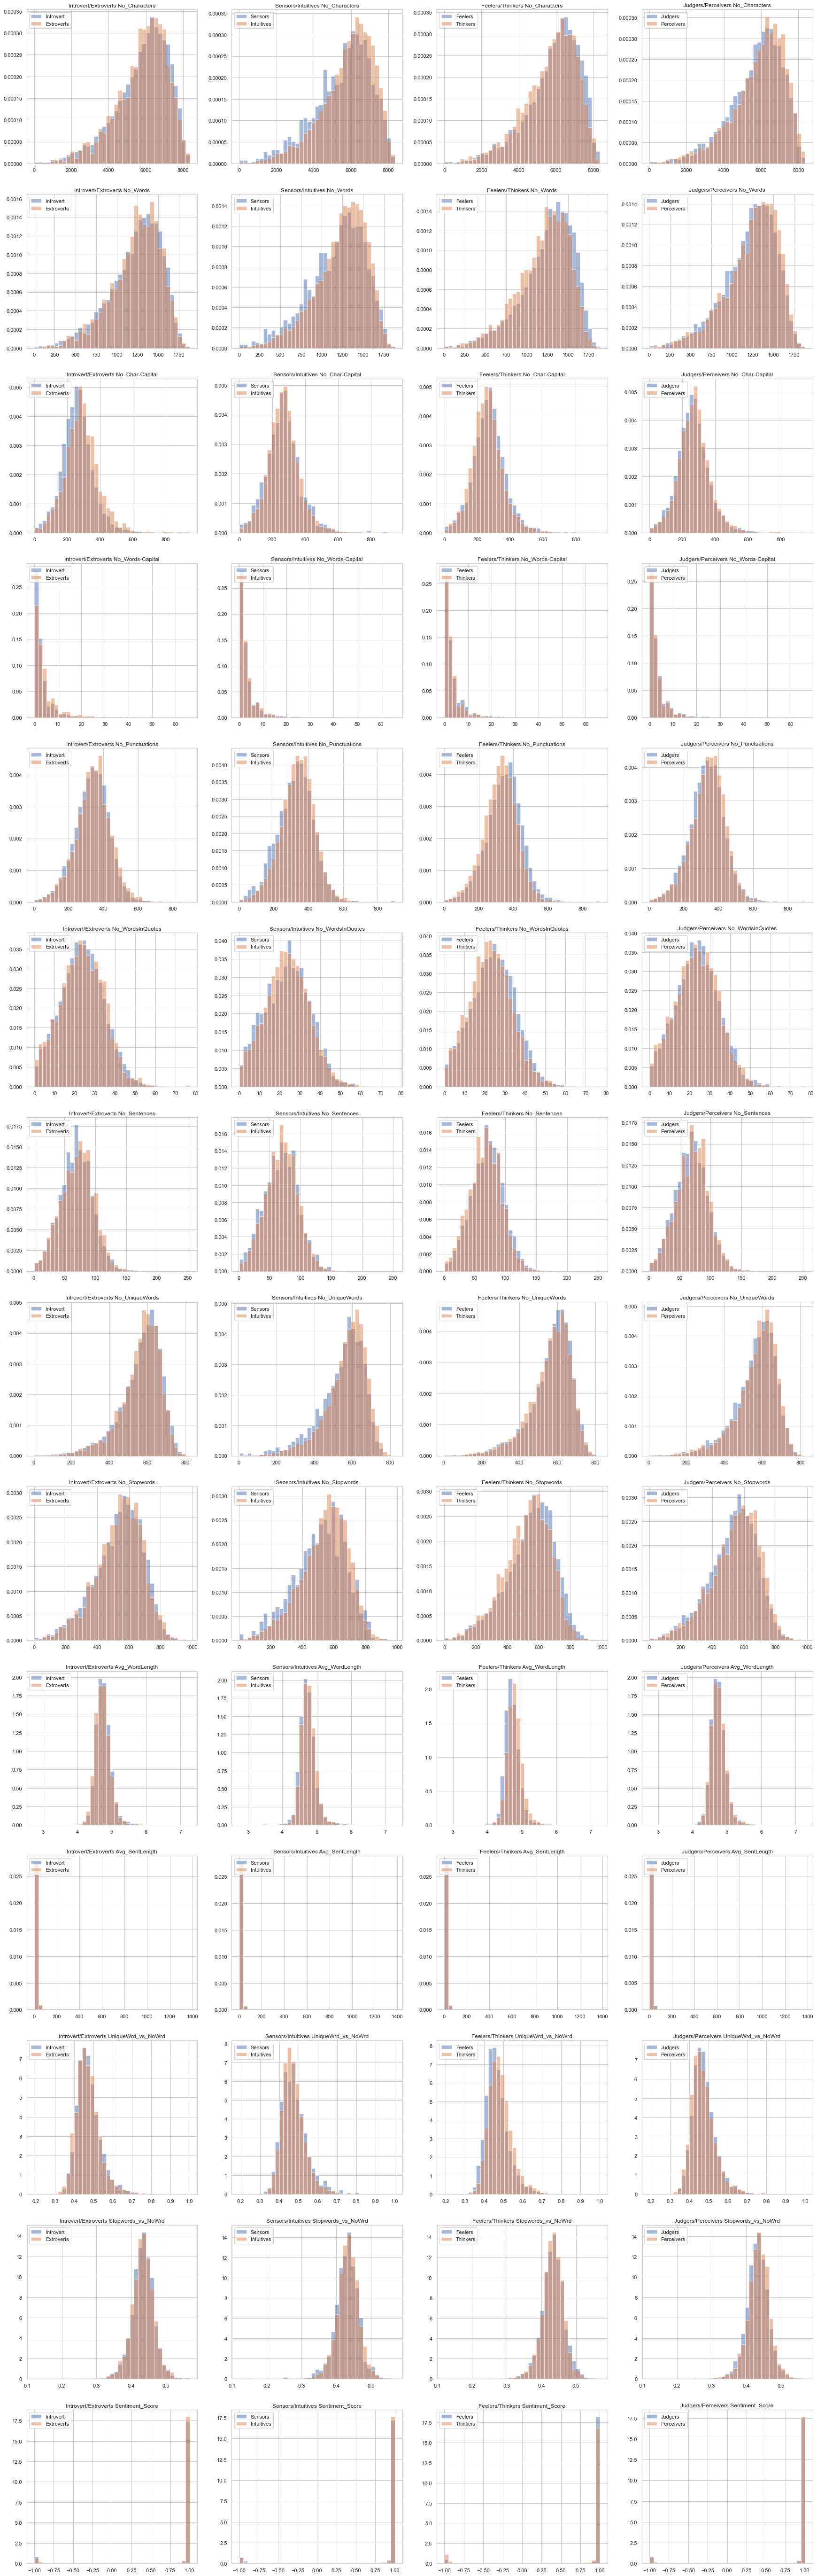

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

feature_List = ['No_Characters', 'No_Words', 'No_Char-Capital', 'No_Words-Capital', 'No_Punctuations', 'No_WordsInQuotes', 'No_Sentences', 'No_UniqueWords', 'No_Stopwords', 'Avg_WordLength', 'Avg_SentLength', 'UniqueWrd_vs_NoWrd', 'Stopwords_vs_NoWrd','Sentiment_Score']

fig, ax = plt.subplots(len(feature_List),4, figsize=(30,100))

for i, feature in enumerate(feature_List):
    bins = np.linspace(mbti_FE[feature].min(), mbti_FE[feature].max(), 40)
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'I'][feature], bins, alpha = 0.5, density=True, label = 'Introvert')
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'E'][feature], bins, alpha = 0.5, density=True, label = 'Extroverts')
    ax[i,0].legend(loc='upper left')
    ax[i,0].title.set_text('Introvert/Extroverts ' + feature)

    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'S'][feature], bins, alpha = 0.5, density=True, label = 'Sensors')
    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'N'][feature], bins, alpha = 0.5, density=True, label = 'Intuitives')
    ax[i,1].legend(loc='upper left')
    ax[i,1].title.set_text('Sensors/Intuitives ' + feature)

    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'F'][feature], bins, alpha = 0.5, density=True, label = 'Feelers')
    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'T'][feature], bins, alpha = 0.5, density=True, label = 'Thinkers')
    ax[i,2].legend(loc='upper left')
    ax[i,2].title.set_text('Feelers/Thinkers ' + feature)

    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'P'][feature], bins, alpha = 0.5, density=True, label = 'Judgers')
    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'J'][feature], bins, alpha = 0.5, density=True, label = 'Perceivers')
    ax[i,3].legend(loc='upper left')
    ax[i,3].title.set_text('Judgers/Perceivers ' + feature)

plt.show()


Box-Cox Power Transformation

In [23]:
#import matplotlib.pyplot as plt
#for i in [1,2,3,4,5]:
#    plt.hist((mbti_FE['No_Characters'])**(1/i), bins=40)
#    plt.title('Transformation: 1/{}'.format(str(i)))
#    plt.show()
print("I don't know if I should do trasformation or not")

I don't know if I should do trasformation or not


## Setep 5: Machine Learning Model

### 5-1: Random Forest Model
<br>
1- Can be used for Classification or Regression<br>
2- Easily handles outliers, missing values, etc.<br>
3- Accepts various types of inputs (continues, ordinal, ...)<br>
4- Less likely to overfit<br>
5- Outputs feature importance<br>



In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1,  ) #n_jobs=-1 allow us to create trees in parallel
k_Fold = KFold(n_splits=5)


additonal_Features = ['No_Characters', 'No_Words', 'No_Char-Capital', 'No_Words-Capital', 'No_Punctuations', 'No_WordsInQuotes', 'No_Sentences', 'No_UniqueWords', 'No_Stopwords', 'Avg_WordLength', 'Avg_SentLength', 'UniqueWrd_vs_NoWrd', 'Stopwords_vs_NoWrd','Sentiment_Score']
vectorizer_List = [full_Lem_CV, full_Lem_Ngram, full_Lem_tfidf]

for each_vect in vectorizer_List:
    X_Features = pd.concat( [mbti_FE[additonal_Features], pd.DataFrame(each_vect.toarray()) ], axis=1)
    print('Count Vectorization',cross_val_score(rf, X_Features, mbti_Dataset['IE'], cv=k_Fold, scoring='accuracy', n_jobs=-1))
    #print('N-gram Vectorizing',cross_val_score(rf, full_Lem_Ngram, mbti_Dataset['IE'], cv=k_Fold, scoring='accuracy', n_jobs=-1))
    #print('TFIDF',cross_val_score(rf, full_Lem_tfidf, mbti_Dataset['IE'], cv=k_Fold, scoring='accuracy', n_jobs=-1))


NameError: name 'full_Lem_CV' is not defined

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

train_test_split()

In [25]:
full_Lem_CV.head()

AttributeError: head not found

Accuracy =
Precision = 
Recall =